## 精准率和召回率之间的平衡     

对于一个分类问题，比如逻辑回归模型，是通过$\theta(X_b)$来计算一个分数，然后带入一个决策函数（sigmoid）来实现分类概率的计算，然后根据分类的阈值具体决定分类的类别，这里默认的阈值为0    

**这里的阈值对精准率和召回率有很大的影响**    

如下图，我们通过移动阈值（纵轴方向的那条直线），会得到不同的精确率和召回率   

![pr](./img/pr.png)

### 下面我们通过调整阈值来观察精准率和召回率的变化   

In [15]:
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets

In [16]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 构造极偏数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [17]:
from sklearn.model_selection import train_test_split   

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/barackbao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**使用decision_function函数可以计算对输入的样本点，经过决策函数计算得到的结果，我们可以对这个结果设计阈值来进行下一步的判别**

In [19]:
decision_scores = log_reg.decision_function(X_test)

In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 

precisions = []
recalls = []
# 先构造一个阈值的序列,步长为0.1
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
# 然后对阈值序列中的每一个阈值都进行一次预测
for threshold in thresholds:
    # 决策函数计算得到的结果与每一个阈值进行预测，然后计算每个阈值对应的精准率和召回率
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

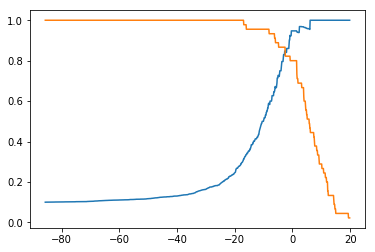

In [21]:
# 绘制阈值与精准率和召回率的变化关系   
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### Precision-Recall 曲线  

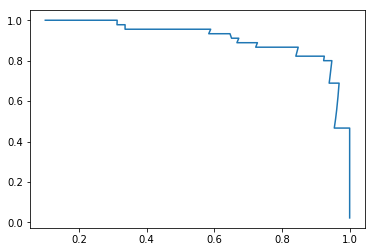

In [22]:
plt.plot(precisions, recalls)
plt.show()

上图中可以看到图像横轴代表精确率，纵轴代表召回率，曲线一直在下降，但是在接近0.9时，突然极具下降    

这个点有可能就是精确率和召回率之间最佳的平衡点，可以同时达到二者都是最大值   

#### scikit-learn中的Precision-Recall曲线   

In [23]:
from sklearn.metrics import precision_recall_curve

# 这里计算曲线坐标时，阈值步长的选取是由函数自动完成的
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [24]:
print(precisions.shape)
print(recalls.shape)
# thresholds数量要比精确率和召回率的数量少1，这是因为sklearn规定最后一组(precision,recall)=(1, 0)没有阈值  
print(thresholds.shape)

(145,)
(145,)
(144,)


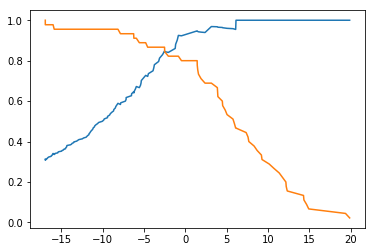

In [25]:
# 重新绘制曲线   
# 去除掉多余的一个值
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

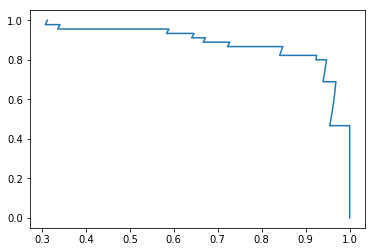

In [26]:
plt.plot(precisions, recalls)
plt.show()